In [ ]:
%pip install jupyter ipywidgets huggingface-hub datasets pandas tensorflow keras opencv-python matplotlib scikit-learn seaborn keras

Note: you may need to restart the kernel to use updated packages.


Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [3]:
from datasets import load_dataset

df = load_dataset("tungdop2/pokemon", split="train")

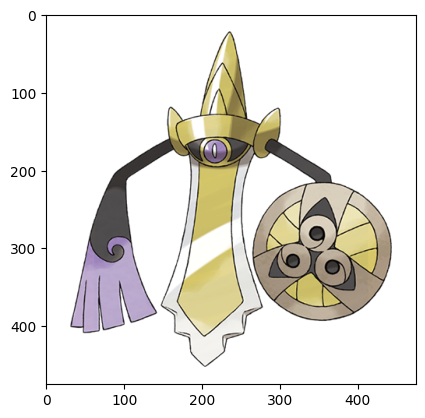

In [4]:
plt.imshow(np.asarray(df['image'][6]))

In [5]:
def euclidean_distance(color1, color2):
    return (sum((c1 - c2) ** 2 for c1, c2 in zip(color1, color2)))**(1/2)

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

color_categories = {
    "red": ["#CD5C5C", "#F08080", "#FA8072", "#E9967A", "#FFA07A", "#DC143C", "#FF0000", "#B22222", "#8B0000"],
    "pink": ["#FFC0CB", "#FFB6C1", "#FF69B4", "#FF1493", "#C71585", "#DB7093"],
    "orange": ["#FFA07A", "#FF7F50", "#FF6347", "#FF4500", "#FF8C00", "#FFA500"],
    "yellow": ["#FFD700", "#FFFF00", "#FFFFE0", "#FFFACD", "#FAFAD2", "#FFEFD5", "#FFE4B5", "#FFDAB9", "#EEE8AA", "#F0E68C", "#BDB76B"],
    "purple": ["#E6E6FA", "#D8BFD8", "#DDA0DD", "#EE82EE", "#DA70D6", "#FF00FF", "#FF00FF", "#BA55D3", "#9370DB", "#663399", "#8A2BE2", "#9400D3", "#9932CC", "#8B008B", "#800080", "#4B0082", "#6A5ACD", "#483D8B", "#7B68EE"],
    "green": ["#ADFF2F", "#7FFF00", "#7CFC00", "#00FF00", "#32CD32", "#98FB98", "#90EE90", "#00FA9A", "#00FF7F", "#3CB371", "#2E8B57", "#228B22", "#008000", "#006400", "#9ACD32", "#6B8E23", "#808000", "#556B2F", "#66CDAA", "#8FBC8B", "#20B2AA", "#008B8B", "#008080"],
    "blue": ["#00FFFF", "#00FFFF", "#E0FFFF", "#AFEEEE", "#7FFFD4", "#40E0D0", "#48D1CC", "#00CED1", "#5F9EA0", "#4682B4", "#B0C4DE", "#B0E0E6", "#ADD8E6", "#87CEEB", "#87CEFA", "#00BFFF", "#1E90FF", "#6495ED", "#7B68EE", "#4169E1", "#0000FF", "#0000CD", "#00008B", "#000080", "#191970"],
    "brown": ["#FFF8DC", "#FFEBCD", "#FFE4C4", "#FFDEAD", "#F5DEB3", "#DEB887", "#D2B48C", "#BC8F8F", "#F4A460", "#DAA520", "#B8860B", "#CD853F", "#D2691E", "#8B4513", "#A0522D", "#A52A2A", "#800000"],
    "white": ["#FFFFFF", "#FFFAFA", "#F0FFF0", "#F5FFFA", "#F0FFFF", "#F0F8FF", "#F8F8FF", "#F5F5F5", "#FFF5EE", "#F5F5DC", "#FDF5E6", "#FFFAF0", "#FFFFF0", "#FAEBD7", "#FAF0E6", "#FFF0F5", "#FFE4E1"],
    "gray": ["#DCDCDC", "#D3D3D3", "#C0C0C0", "#A9A9A9", "#808080", "#696969", "#778899", "#708090", "#2F4F4F", "#000000"]
}

In [6]:
def find_closest_color(rgb_input):
    
    min_distance = float('inf')
    closest_category = "black"
    for category, hex_values in color_categories.items():
        for hex_value in hex_values:
            distance = euclidean_distance(rgb_input, hex_to_rgb(hex_value))
            if distance < min_distance:
                min_distance = distance
                closest_category = category
    
    return closest_category

Creating the dataset True Values using K-means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10)

X = []
y = []
images = []

for row in df:
    image = np.asarray(row['image'])
    mask = image[:, :, 3] > 220
    filtered_img = image[mask, :3]

    if len(filtered_img) == 0:
        y.append("#000000")
        continue

    pred_labels = kmeans.fit_predict(filtered_img)
    unique_labels, counts = np.unique(pred_labels, return_counts=True)
    dominant_label = unique_labels[np.argmax(counts)]

    dominant_color = kmeans.cluster_centers_[dominant_label]

    X.append(row['name'])
    y.append(find_closest_color(dominant_color))
    cleaned_image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    cleaned_image = cv2.resize(cleaned_image, (128, 128))
    images.append(cleaned_image)

In [ ]:
X[0]

'abomasnow-mega'

In [ ]:
y[0]

'white'

In [ ]:
images

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

Save dataset to file

In [ ]:
import os

data = [["Pokemon"] + X, ["Color"] + y]
df_to_save = pd.DataFrame(data).transpose()
df_to_save.columns = df_to_save.iloc[0]
df_to_save = df_to_save[1:]
df_to_save.to_csv("Dataset.csv", index=False)

Training Traditional ML Model

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(images, y_encoded)

In [ ]:
X_train = np.array([img.flatten() for img in X_train])
X_test = np.array([img.flatten() for img in X_test])

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=5,                
        Cs=20,               
        penalty='l1',        
        solver='saga',       
        max_iter=5000,
        random_state=351342352
    )
)

In [ ]:
hist = model.fit(X_train, y_train)

Evaluation of traditional Model

In [ ]:
predictions = model.predict(X_test)

c:\Users\Satgu\Documents\VS Code\AI\Pokemon Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Satgu\Documents\VS Code\AI\Pokemon Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Satgu\Documents\VS Code\AI\Pokemon Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.33      0.18      0.24        44
           2       0.43      0.97      0.60       123
           3       1.00      0.05      0.09        22
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        21
           8       0.50      0.30      0.38        30
           9       0.00      0.00      0.00        11

    accuracy                           0.43       318
   macro avg       0.23      0.15      0.13       318
weighted avg       0.33      0.43      0.31       318



<Axes: >

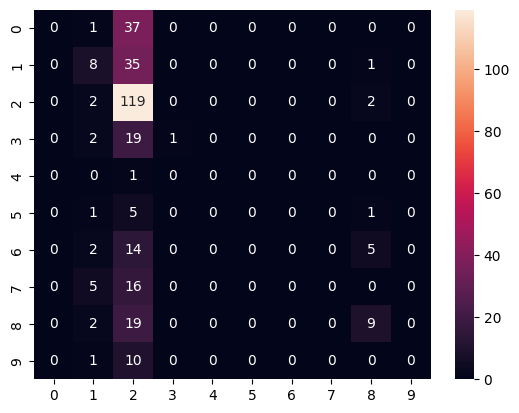

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(predictions, y_test)
print("Classification Report:\n", classification_report(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), fmt='', annot=True)

Save output of traditional learning

In [ ]:
# Map the indices of X_train and X_test back to the original X list
train_indices = [images.index(img.reshape(128, 128, 3)) for img in X_train.reshape(-1, 128, 128, 3)]
test_indices = [images.index(img.reshape(128, 128, 3)) for img in X_test.reshape(-1, 128, 128, 3)]

# Combine train and test data into a single DataFrame
combined_data = pd.DataFrame({
    'Name': [X[i] for i in train_indices + test_indices],
    'Color': [y[i] for i in train_indices + test_indices]
})

# Sort the DataFrame alphabetically by the "Name" column
combined_data = combined_data.sort_values(by="Name")

# Save to a single CSV file
combined_data.to_csv("Traditional_output.csv", index=False)

Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

c:\Users\Satgu\Documents\VS Code\AI\Pokemon Classifier\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((images, y_encoded))

train_size = int(0.8 * len(images))
test_size = int(0.1*len(images))
val_size = int(0.1 * len(images))

train_dataset = dataset.take(train_size).batch(32)
test_dataset = dataset.skip(train_size).take(test_size).batch(16)
val_dataset = dataset.skip(train_size+test_size).batch(16)

In [ ]:
y_validation_data = np.concatenate([y.numpy() for _, y in val_dataset], axis=0)

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 5576.4141 - sparse_categorical_accuracy: 0.2082 - val_loss: 180.3140 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 111.7546 - sparse_categorical_accuracy: 0.3582 - val_loss: 40.8392 - val_sparse_categorical_accuracy: 0.4375
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 23.1487 - sparse_categorical_accuracy: 0.5572 - val_loss: 34.4325 - val_sparse_categorical_accuracy: 0.3438
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 8.6101 - sparse_categorical_accuracy: 0.7145 - val_loss: 22.6523 - val_sparse_categorical_accuracy: 0.3438
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 1.2911 - sparse_categorical_accuracy: 0.9079 - val_loss: 22.3401 - val_sparse_categorical_accuracy: 0.4219
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.2044 - sparse_categorical_accuracy: 0.9678 - val_loss: 22.2085 - val_sparse_categorical_accuracy

In [ ]:
evaluation = model.evaluate(test_dataset)
print(dict(zip(model.metrics_names, evaluation)))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.2223 - sparse_categorical_accuracy: 0.2904
{'loss': 25.720579147338867, 'compile_metrics': 0.3700787425041199}


In [ ]:
predictions = model.predict(val_dataset)
predictions = np.argmax(predictions, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Accuracy:  0.3700787425041199
Precision:  0.9411765
Recall:  0.9411765


<Axes: >

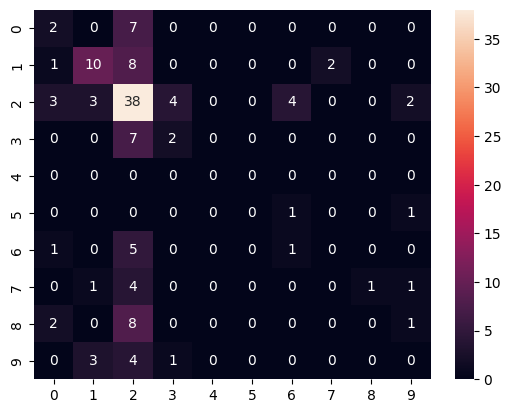

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

precision.update_state(y_validation_data, predictions)
recall.update_state(y_validation_data, predictions)

print("Accuracy: ", evaluation[1])
print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())

conf_matrix = tf.math.confusion_matrix(y_validation_data, predictions)
sns.heatmap(conf_matrix, annot=True)